<a href="https://colab.research.google.com/github/doaa450/Hybrid-Model/blob/main/House_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
sns.set(style = 'white')
%matplotlib inline

In [2]:
# Load the  housing dataset
df = pd.read_csv('/content/housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


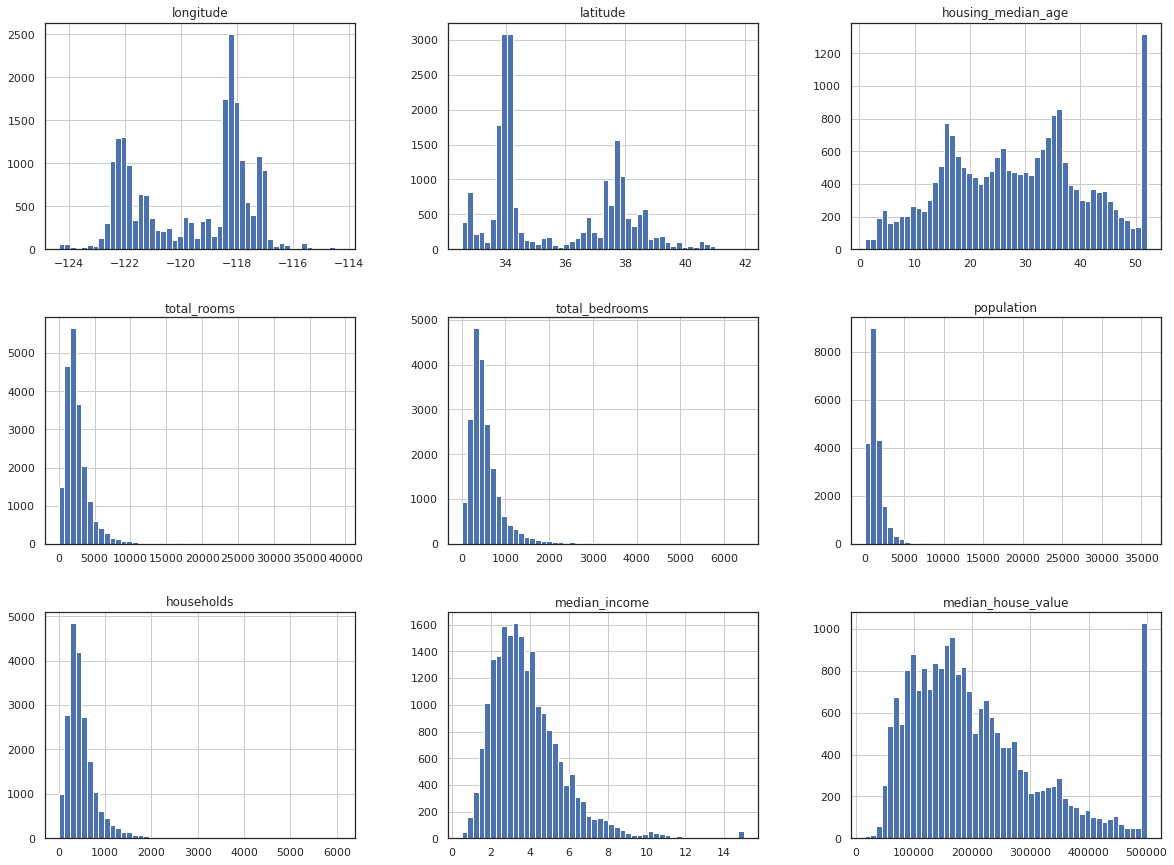

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

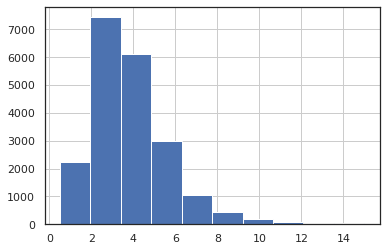

In [8]:
df["median_income"].hist()

###  Looking for Correlations


In [9]:
corr_matrix = df.corr()

In [10]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

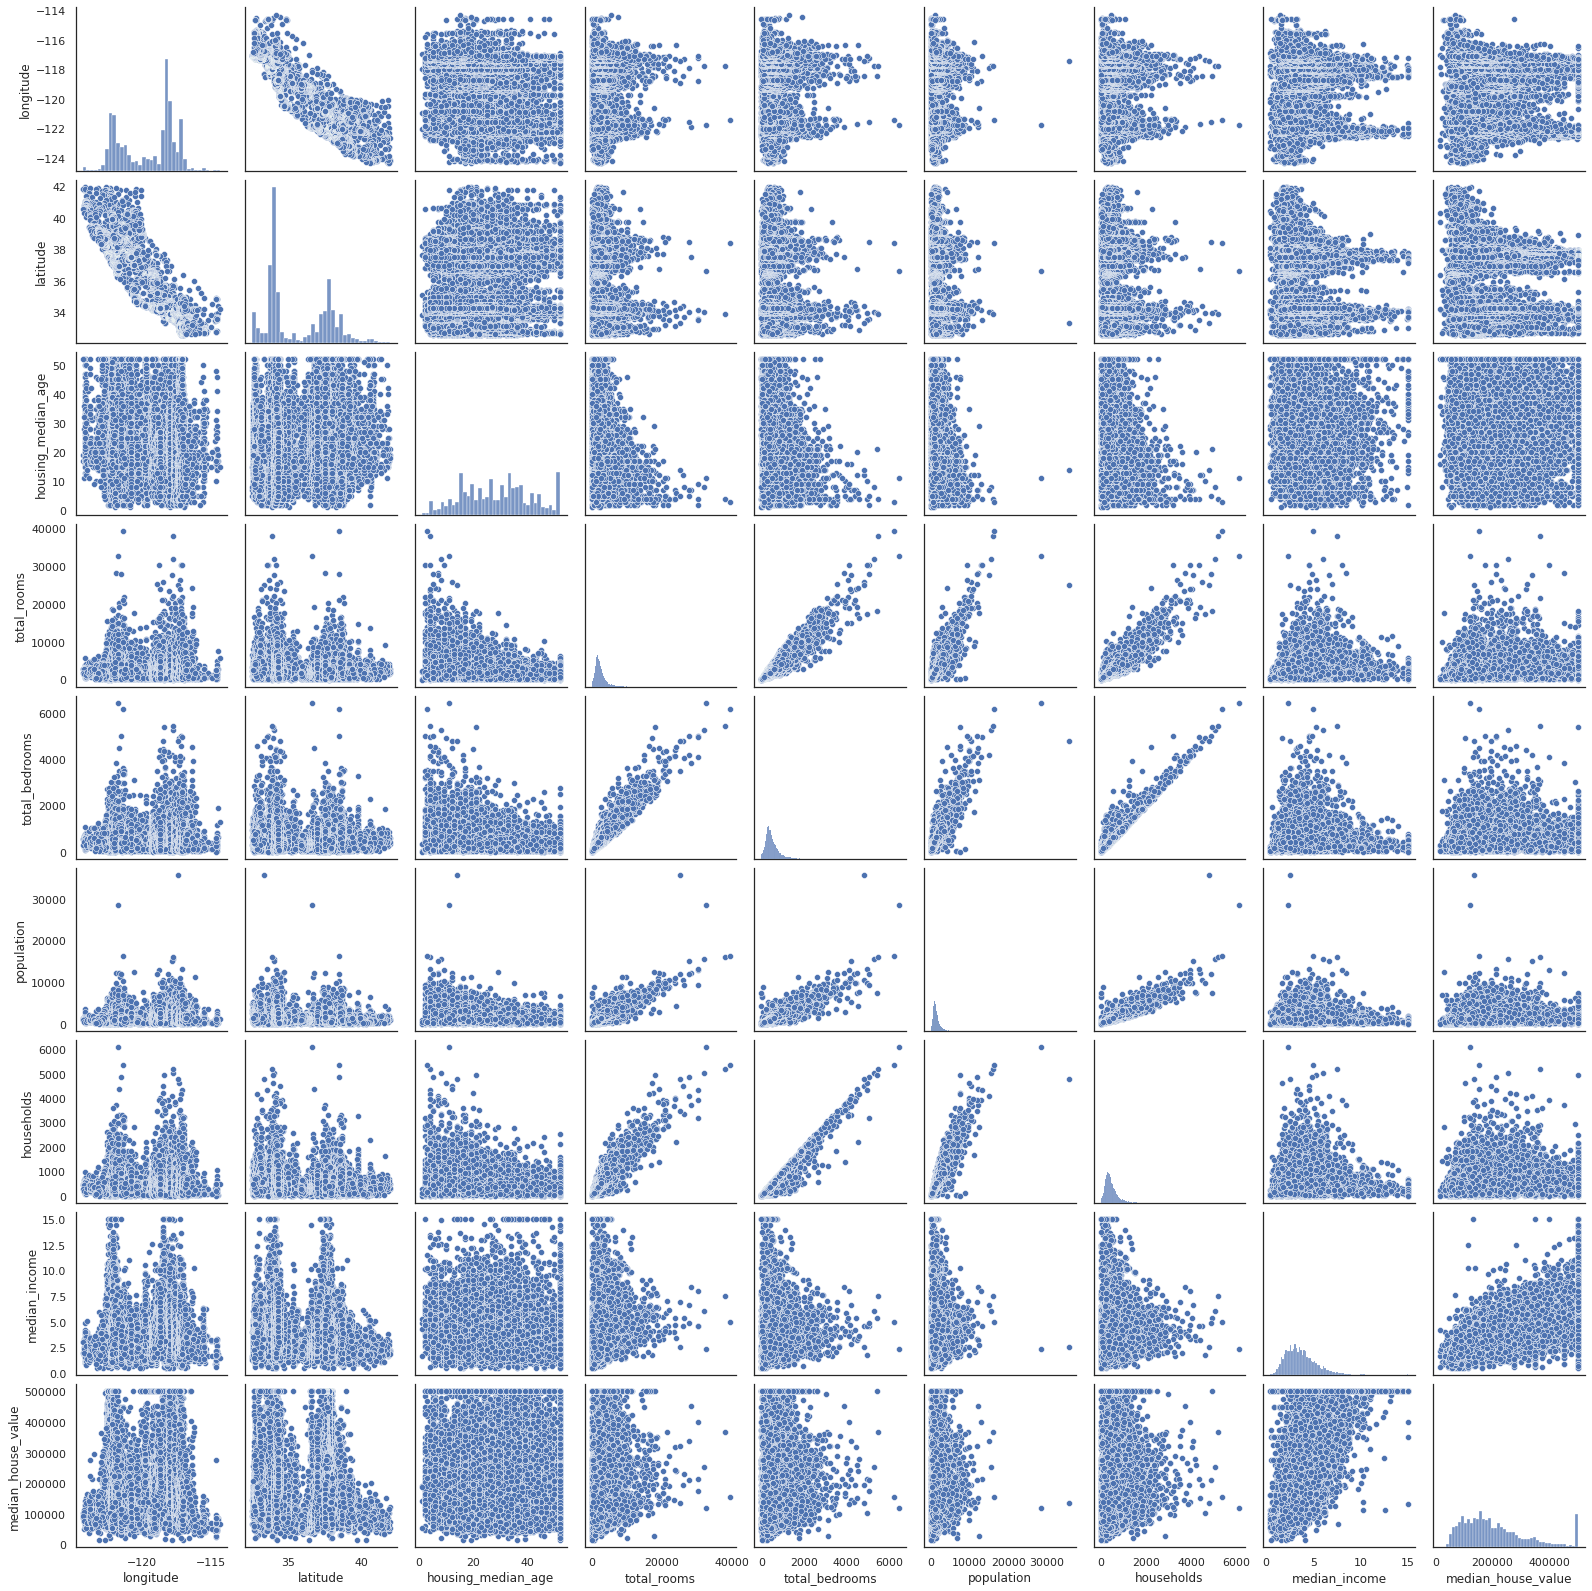

In [11]:
sns.pairplot(df)

### Prepare the Data for Machine Learning Algorithms


# Data Cleaning


In [12]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [13]:
median = df["total_bedrooms"].median()
df["total_bedrooms"].fillna(median, inplace=True) 

In [14]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Handling Text and Categorical Attributes


In [15]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

In [16]:
X=df.drop('median_house_value', axis = 1)
y=df['median_house_value']

In [17]:
#  Shuffle and split the data into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [19]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Select and Train a Model


In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [21]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(x_test)
lin_mse = mean_squared_error(y_test, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69214.05184884857

In [22]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, housing_predictions)
lin_mae

50082.45711695671

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)



DecisionTreeRegressor(random_state=42)

In [24]:
housing_predictions = tree_reg.predict(x_test)
tree_mse = mean_squared_error(y_test, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

69696.65786070228

### Better Evaluation Using Cross-Validation


In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [26]:


def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)



Scores: [70053.19196611 69303.26298215 70861.13010636 64627.08552305
 65919.5727406  69988.6066028  66342.2075056  69615.39621189
 67008.05302622 71761.35867886]
Mean: 68547.98653436314
Standard deviation: 2263.7603533562174


In [27]:
lin_scores = cross_val_score(lin_reg, x_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [65265.95107753 71544.09268711 70083.99270184 64410.85870816
 70860.21949062 70527.59884981 68343.62526636 68923.01726843
 66379.37553342 70763.03455853]
Mean: 68710.17661418127
Standard deviation: 2408.6822820984653


In [28]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
housing_predictions = forest_reg.predict(x_train)
forest_mse = mean_squared_error(y_train, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18033.640126970884

### Fine-Tune Your Model



Grid Search


In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [110, 120, 200], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [110, 120, 200]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [36]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 200}

In [37]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=200, random_state=42)

In [38]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=200, random_state=42,max_features= 8)
forest_reg.fit(x_train, y_train)

RandomForestRegressor(max_features=8, n_estimators=200, random_state=42)

In [39]:
housing_predictions = forest_reg.predict(x_train)
forest_mse = mean_squared_error(y_train, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

17625.67704265568